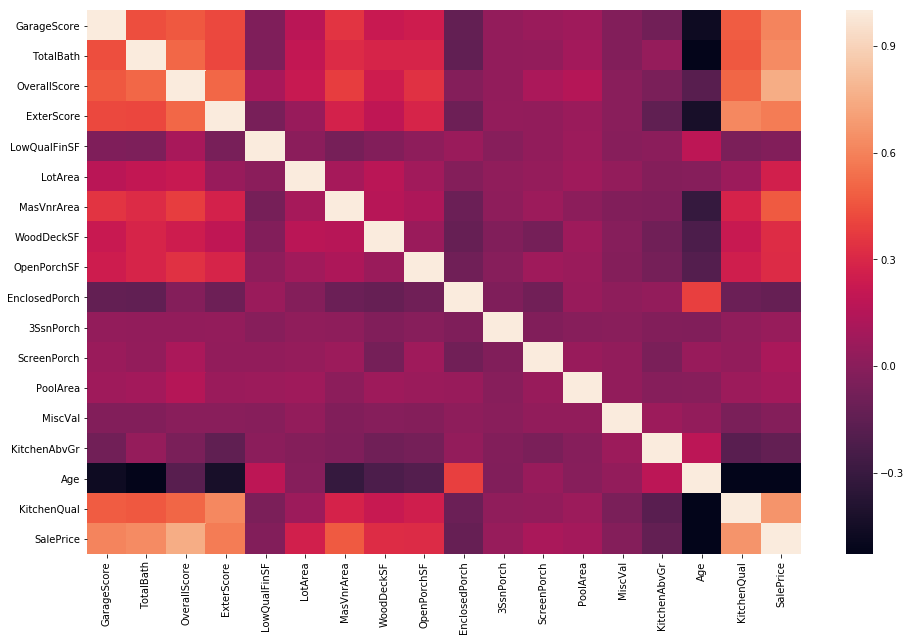

In [50]:
import numpy as np
import pandas as pd
from scipy import stats
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# cd ~/Documents/NYC\ Data\ Science\ Academy/HousingPrice_ML_Project/
###############################################################################
############################### READ IN DATA ##################################
###############################################################################

df = pd.read_csv("data/train.csv")
train_id = df["Id"]
df2 = pd.read_csv("data/test.csv")
test_id = df2["Id"]
df2 = pd.concat([df2, pd.DataFrame(np.zeros(len(df2)), columns = ['SalePrice'])], axis = 1)
#df = df.drop("Id", axis = 1)
df = df.merge(df2, on = df.columns.tolist(), how = "outer")
df.set_index("Id", inplace = True)
del(df2)

df.shape

df.dtypes

# Columns with missing data
df.columns[df.isnull().any(axis = 0)]

## MISSINGNESS IN COLUMNS
df.isnull().sum(axis = 0).sort_values(ascending = False)
# Percent of missingness in each column
df.isnull().sum(axis = 0).sort_values(ascending = False)/df.shape[0]

## MISSINGNESS IN ROWS
df.isnull().sum(axis = 1).sort_values(ascending = False)
# Percent of missingness in each row
df.isnull().sum(axis = 1).sort_values(ascending = False)/df.shape[1]

df.columns
df.columns[df.isnull().any(axis = 0)]



###############################################################################
############################ FILL IN MISSING DATA ##############################
###############################################################################

## MSZoning: Fill in with most common value
df['MSZoning'].value_counts()
sum(df['MSZoning'].isna())
df['MSZoning'].fillna("RL", inplace = True)
df.columns[df.isnull().any(axis = 0)]

#################### Filling in LotFrontage with log(LotArea) #################
#We can impute the missing data with the log-transform of lot area, correlation ~0.68
df[['LotFrontage','LotArea']].corr()
pd.concat([df['LotFrontage'], np.log(df['LotArea'])], axis = 1).corr()
df['LotFrontage'] = np.log(df['LotArea'])
df.columns[df.isnull().any(axis = 0)]

## Filling in "NaN" in Alley with "None"
df['Alley'].value_counts()
sum(df['Alley'].isna())
df['Alley'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

## Filling in missing Utilities with AllPub (most common)
df['Utilities'].value_counts()
df['Utilities'].fillna("AllPub", inplace = True)
df.columns[df.isnull().any(axis = 0)]

## Filling in Exterior1st and Exterior2nd with most common values
df['Exterior1st'].value_counts()
sum(df['Exterior1st'].isna())
df['Exterior1st'].fillna("VinylSd", inplace = True)
df['Exterior2nd'].value_counts()
sum(df['Exterior2nd'].isna())
df['Exterior2nd'].fillna("VinylSd", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# MasVnrType: NaN values are the same for type and area -- assume "None" and "0"
df[df['MasVnrType'].isna()].index
df[df['MasVnrArea'].isna()].index
df['MasVnrType'].fillna("NA", inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Basement
# BsmtQual: None
df['BsmtQual'].fillna("NA", inplace = True)
# BsmtCond: None
df['BsmtCond'].fillna("NA", inplace = True)
# BsmtExposure: None
df['BsmtExposure'].fillna("NA", inplace = True)
# BsmtFinType1: None
df['BsmtFinType1'].fillna("NA", inplace = True)
# No basement
df['BsmtFinSF1'].fillna(0, inplace = True)
# BsmtFinType2: None
df['BsmtFinType2'].fillna("NA", inplace = True)
# No basement
df['BsmtFinSF2'].fillna(0, inplace = True)
# No basement
df['BsmtUnfSF'].fillna(0, inplace = True)
# No basement
df['TotalBsmtSF'].fillna(0, inplace = True)
# No basement
df['BsmtFullBath'].fillna(0, inplace = True)
# No basement
df['BsmtHalfBath'].fillna(0, inplace = True)
df.columns[df.isnull().any(axis = 0)]

# We decided to fill in the onemissing "Electrical" value with "SBrkr" since this is the most common one
df['Electrical'].value_counts()
df['Electrical'].fillna("SBrkr", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# No kitchen
df['KitchenQual'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Functional: fill mode
df['Functional'].fillna("Typ", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# No fireplace
df['FireplaceQu'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# No garage
df['GarageArea'].value_counts()
df['GarageType'].fillna("NA", inplace = True)
df['GarageYrBlt'].fillna(0, inplace = True)
df['GarageFinish'].fillna("NA", inplace = True)
df['GarageCars'].fillna(0, inplace = True)
df['GarageArea'].fillna(0, inplace = True)
df['GarageQual'].fillna("NA", inplace = True)
df['GarageCond'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# No pool
sum(df['PoolQC'].isna())
df['PoolArea'].value_counts()
df['PoolQC'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# No fence
df['Fence'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Fill in MiscFeature
df['MiscFeature'].fillna("NA", inplace = True)
df.columns[df.isnull().any(axis = 0)]

# Fill in with most common SaleType
df['SaleType'].fillna("WD", inplace = True)
df.columns[df.isnull().any(axis = 0)]





###############################################################################
############################# DUMMIFY VARIABLES ###############################
###############################################################################
df_fe = df.copy()

#Begin feature extraction
#######################################################
#Col ID
#Remove Col Id
#df_fe = df_fe.drop('Id', axis = 1)
#######################################################
#MSSubClass
dummy_df = pd.get_dummies(df_fe['MSSubClass'], drop_first=True, prefix = 'MSSubClass')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MSSubClass', axis = 1)
#######################################################
#MSZoning
dummy_df = pd.get_dummies(df_fe['MSZoning'], drop_first=True, prefix = 'MSZoning')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MSZoning', axis = 1)
#######################################################
#Lot Frontage
df_fe = df_fe.drop('LotFrontage', axis = 1)
#######################################################
#Area
#######################################################
#Street
#Remove Column
dummy_df = pd.get_dummies(df_fe['Street'], drop_first=True, prefix = 'Street')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Street', axis = 1)
#######################################################
#Alley
dummy_df = pd.get_dummies(df_fe['Alley'], drop_first=True, prefix = 'Alley')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Alley', axis = 1)
#######################################################
#LotShape
dummy_df = pd.get_dummies(df_fe['LotShape'], drop_first=True, prefix = 'LotShape')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('LotShape', axis = 1)
#######################################################
#LandContour
dummy_df = pd.get_dummies(df_fe['LandContour'], drop_first=True, prefix = 'LandContour')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('LandContour', axis = 1)
#######################################################
#Utilities
dummy_df = pd.get_dummies(df_fe['Utilities'], drop_first=True, prefix = 'Utilities')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Utilities', axis = 1)
#######################################################
#LotConfig
dummy_df = pd.get_dummies(df_fe['LotConfig'], drop_first=True, prefix = 'LotConfig')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('LotConfig', axis = 1)
#######################################################
#LandSlope
dummy_df = pd.get_dummies(df_fe['LandSlope'], drop_first=True, prefix = 'LandSlope')
df_fe = pd.concat([df_fe, dummy_df], axis = 1)
df_fe = df_fe.drop('LandSlope', axis = 1)
#######################################################
#Neighborhood
dummy_df = pd.get_dummies(df_fe['Neighborhood'], drop_first=True, prefix = 'Neighborhood')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Neighborhood', axis = 1) 
#######################################################
#Condition1
dummy_df = pd.get_dummies(df_fe['Condition1'], drop_first=True, prefix = 'Condition1')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Condition1', axis = 1)
#######################################################
#Condition2
dummy_df = pd.get_dummies(df_fe['Condition2'], drop_first=True, prefix = 'Condition2')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Condition2', axis = 1)
#######################################################
#BldgType
dummy_df = pd.get_dummies(df_fe['BldgType'], drop_first=True, prefix = 'BldgType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BldgType', axis = 1)
#######################################################
#HouseStyle
dummy_df = pd.get_dummies(df_fe['HouseStyle'], drop_first = True, prefix = "HouseStyle")
df_fe = pd.concat([df_fe, dummy_df], axis = 1) 
df_fe = df_fe.drop('HouseStyle', axis = 1)
#######################################################
#OverallQual
##Create interaction feature OverallQualCond = OverallQual*OverallCond
df_fe['OverallQualCond'] = df_fe['OverallQual']*df_fe['OverallCond']
#Remove Column
df_fe = df_fe.drop('OverallQual', axis = 1)
#######################################################
#OverallCond
##Remove Column 
df_fe = df_fe.drop('OverallCond', axis = 1)
#######################################################
#YearBuilt
#Create interaction feature Age = YearSold-YearBuilt
df_fe['Age'] = df_fe['YrSold']-df_fe['YearBuilt']
#######################################################
#YearRemodAdd
#Create interaction feature Age = YearSold-YearBuilt
#######################################################
#RoofStyle
#Combine classes - 'Flat','Gambrel','Mansard','Shed' into a single class "Other"
dummy_df = pd.get_dummies(df_fe['RoofStyle'], drop_first=True, prefix = 'RoofStyle')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('RoofStyle', axis = 1)
#######################################################
#RoofMatl
#Combine classes - 'Tar&Grv','WdShngl','WdShake','Roll','Membran','Metal','ClyTile' 
#into a single class "NotShingle"
dummy_df = pd.get_dummies(df_fe['RoofMatl'], drop_first=True, prefix = 'RoofMatl')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('RoofMatl', axis = 1)
#######################################################
#Exterior1st
dummy_df = pd.get_dummies(df_fe['Exterior1st'], drop_first=True, prefix = 'Exterior1st')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Exterior1st', axis = 1)
#######################################################
#Exterior2nd
dummy_df = pd.get_dummies(df_fe['Exterior2nd'], drop_first=True, prefix = 'Exterior2nd')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Exterior2nd', axis = 1)
#######################################################
#MasVnrType
dummy_df = pd.get_dummies(df_fe['MasVnrType'], drop_first=True, prefix = 'MasVnrType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MasVnrType', axis = 1)
#######################################################
#MasVnrArea
#######################################################
#ExterQual
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['ExterQual'] = df_fe['ExterQual'].map(ord_map)
#######################################################
#ExterCond
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['ExterCond'] = df_fe['ExterCond'].map(ord_map)

df_fe['ExterScore'] = df_fe['ExterQual']*df_fe['ExterCond']
df_fe = df_fe.drop(['ExterQual','ExterCond'], axis = 1)
#######################################################
#Foundation
#Dummify
dummy_df = pd.get_dummies(df_fe['Foundation'], drop_first=True, prefix = 'Foundation')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Foundation', axis = 1)
#######################################################
#BsmtQual
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['BsmtQual'] = df_fe['BsmtQual'].map(ord_map)
#######################################################
#BsmtCond
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['BsmtCond'] = df_fe['BsmtCond'].map(ord_map)
#######################################################
#BsmtExposure
dummy_df = pd.get_dummies(df_fe['BsmtExposure'], drop_first=True, prefix = 'BsmtExposure')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BsmtExposure', axis = 1)
#######################################################
#BsmtFinType1
dummy_df = pd.get_dummies(df_fe['BsmtFinType1'], drop_first=True, prefix = 'BsmtFinType1')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BsmtFinType1', axis = 1)
#######################################################
#BsmtFinSF1
#######################################################
#BsmtFinType2
dummy_df = pd.get_dummies(df_fe['BsmtFinType2'], drop_first=True, prefix = 'BsmtFinType2')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('BsmtFinType2', axis = 1)    
#######################################################
#BsmtFinSF2
#######################################################
#BsmtUnfSF
#######################################################
#TotalBsmtSF
#Remove Column Due to Multicolinearity w/1st Flr sqft
df_fe = df_fe.drop(['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF'], axis = 1)
#######################################################
#Heating
dummy_df = pd.get_dummies(df_fe['Heating'], drop_first=True, prefix = 'Heating')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Heating', axis = 1)
#######################################################
#HeatingQC
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['HeatingQC'] = df_fe['HeatingQC'].map(ord_map)
#######################################################
#CentralAir
#Create Binary
ls = ['Y']
df_fe['CentralAir_Bin'] = [1 if x in ls else 0 for x in df_fe['CentralAir'] ]
df_fe = df_fe.drop('CentralAir', axis = 1)
#######################################################
#Electrical
dummy_df = pd.get_dummies(df_fe['Electrical'], drop_first=True, prefix = 'Electrical')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Electrical', axis = 1)   
#######################################################
#1stFlrSF
df_fe = df_fe.drop('1stFlrSF', axis = 1) 
#2ndFlrSF
df_fe = df_fe.drop('2ndFlrSF', axis = 1) 
#######################################################
#LowQualFinSF
#######################################################
#GrLivArea
df_fe['OverallScore'] = df_fe['GrLivArea']*df_fe['OverallQualCond']
df_fe = df_fe.drop(['GrLivArea','OverallQualCond'], axis = 1)

#######################################################
#BsmtFullBath
#######################################################
#BsmtHalfBath
#######################################################
#FullBath
#######################################################
#HalfBath
df_fe['TotalBath'] = (df_fe['FullBath'] + .5*df_fe['HalfBath'] + 
                        df_fe['BsmtFullBath'] + .5*df_fe['BsmtHalfBath'])
#Remove Column
df_fe = df_fe.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'], axis = 1)
#######################################################
#BedroomAbvGr
#######################################################
#KitchenAbvGr
#######################################################
#KitchenQual
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['KitchenQual'] = df_fe['KitchenQual'].map(ord_map)
#######################################################
#TotRmsAbvGrd
#######################################################
#Functional
dummy_df = pd.get_dummies(df_fe['Functional'], drop_first=True, prefix = 'Functional')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Functional', axis = 1)  
#######################################################
#Fireplaces
#######################################################
#FireplaceQu
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
df_fe['FireplaceQu'] = df_fe['FireplaceQu'].map(ord_map)
#######################################################
#GarageType
dummy_df = pd.get_dummies(df_fe['GarageType'], drop_first=True, prefix = 'GarageType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('GarageType', axis = 1)
#######################################################
#GarageYrBlt
df_fe['Gar_Age'] = df_fe['YrSold']-df_fe['GarageYrBlt']
#Remove Column
df_fe = df_fe.drop('GarageYrBlt', axis = 1)
#######################################################
#GarageFinish
dummy_df = pd.get_dummies(df_fe['GarageFinish'], drop_first=True, prefix = 'GarageFinish')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('GarageFinish', axis = 1)   
#######################################################
#GarageCars
#######################################################
#GarageArea
#######################################################
#GarageQual
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['GarageQual'] = df_fe['GarageQual'].map(ord_map)
#######################################################
#GarageCond
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['GarageCond'] = df_fe['GarageCond'].map(ord_map)


#Create interaction feature: GarageScore = GarageQual*GarageCond*GarageArea
df_fe['GarageScore'] = df_fe['GarageQual']*df_fe['GarageCond']*df_fe['GarageArea']
#Remove Columns
df_fe = df_fe.drop(['GarageQual','GarageCond','GarageArea','GarageCars'], axis = 1)
#######################################################
#PavedDrive
dummy_df = pd.get_dummies(df_fe['PavedDrive'], drop_first=True, prefix = 'PavedDrive')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('PavedDrive', axis = 1)
#######################################################
#WoodDeckSF
#######################################################
#OpenPorchSF
#######################################################
#EnclosedPorch
#######################################################
#3SsnPorch
#######################################################
#ScreenPorch
#######################################################
#PoolArea
#All weekly correlated with price
#df_fe = df_fe.drop(['EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis = 1)
#######################################################
#PoolQC
#Set Ordinal Mapping
ord_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'NA':0}
df_fe['PoolQC'] = df_fe['PoolQC'].map(ord_map)
#######################################################   
#Fence
dummy_df = pd.get_dummies(df_fe['Fence'], drop_first=True, prefix = 'Fence')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('Fence', axis = 1)  
#######################################################
#MiscFeature
dummy_df = pd.get_dummies(df_fe['MiscFeature'], drop_first=True, prefix = 'MiscFeature')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MiscFeature', axis = 1) 
#######################################################
#MiscVal
#######################################################
#MoSold
#Dummify
dummy_df = pd.get_dummies(df_fe['MoSold'], drop_first=True, prefix = 'MoSold')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('MoSold', axis = 1) 
#######################################################
#YrSold
#Dummify
#dummy_df = pd.get_dummies(df_fe['YrSold'], drop_first=True, prefix = 'YrSold')
#df_fe = pd.concat([df_fe, dummy_df], axis=1)
#df_fe = df_fe.drop('YrSold', axis = 1) 
#######################################################
#SaleType
#Dummify
dummy_df = pd.get_dummies(df_fe['SaleType'], drop_first=True, prefix = 'SaleType')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('SaleType', axis = 1) 
#######################################################
#SaleCondition
#Dummify
dummy_df = pd.get_dummies(df_fe['SaleCondition'], drop_first=True, prefix = 'SaleCondition')
df_fe = pd.concat([df_fe, dummy_df], axis=1)
df_fe = df_fe.drop('SaleCondition', axis = 1) 
#######################################################
#SalePrice

del (dummy_df, ls, ord_map)

df_fe.columns[df_fe.isnull().any(axis = 0)]

###############################################################################
########################### SPLIT TRAIN AND TEST ##############################
###############################################################################

train = df_fe.drop(index = test_id)
train = pd.concat([train.drop('SalePrice', axis = 1), train['SalePrice']], axis = 1)
train.reset_index(drop = True, inplace = True)
test = df_fe.drop(index = train_id).drop('SalePrice', axis = 1)
test.reset_index(drop = True, inplace = True)

#num_features = ['LotFrontage', 'LotArea', 'OverallQual','OverallCond','MasVnrArea',
#                'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinSF1','BsmtFinSF2',
#                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF',
#                'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
#                '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

bsmt_features = ['BsmtQual','BsmtCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','SalePrice']

gar_features = ['GarageCars','GarageArea','GarageQual','GarageCond','Gar_Age','SalePrice']

kit_features = ['KitchenAbvGr','KitchenQual','SalePrice']

porch_features = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

ext_features = ['LotFrontage', 'LotArea','MasVnrArea','ExterQual','ExterCond','SalePrice']

int_features = ['OverallQual','OverallCond', '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea','SalePrice']

fnl_features = ['GarageScore','TotalBath','OverallScore','ExterScore','LowQualFinSF','LotArea','MasVnrArea',
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 
                'MiscVal','KitchenAbvGr','Age','KitchenQual','SalePrice']
                


#num_features = train[num_features]
#bsmt_features = train[bsmt_features]
#gar_features = train[gar_features]
#kit_features = train[kit_features]
#porch_features = train[porch_features]
#ext_features = train[ext_features]
#int_features = train[int_features]
fnl_features = train[fnl_features]

#train.to_csv("data/train_eda.csv", index = False)

import seaborn as sns
fig = plt.gcf()
fig.set_size_inches( 16, 10)
# calculate the correlation matrix
corr = fnl_features.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
